<a href="https://colab.research.google.com/github/tallurikishore1/649/blob/main/06_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
cars = pd.read_csv(filename)
cars

Saving Cars (1).csv to Cars (1).csv


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
print(cars.head())
print(cars.tail())
print(cars.shape)

   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149
     HP        MPG  VOL          SP         WT
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615
(81, 5)


In [ ]:
cars.isnull()

,HP,MPG,VOL,SP,WT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
76,False,False,False,False,False
77,False,False,False,False,False
78,False,False,False,False,False
79,False,False,False,False,False


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


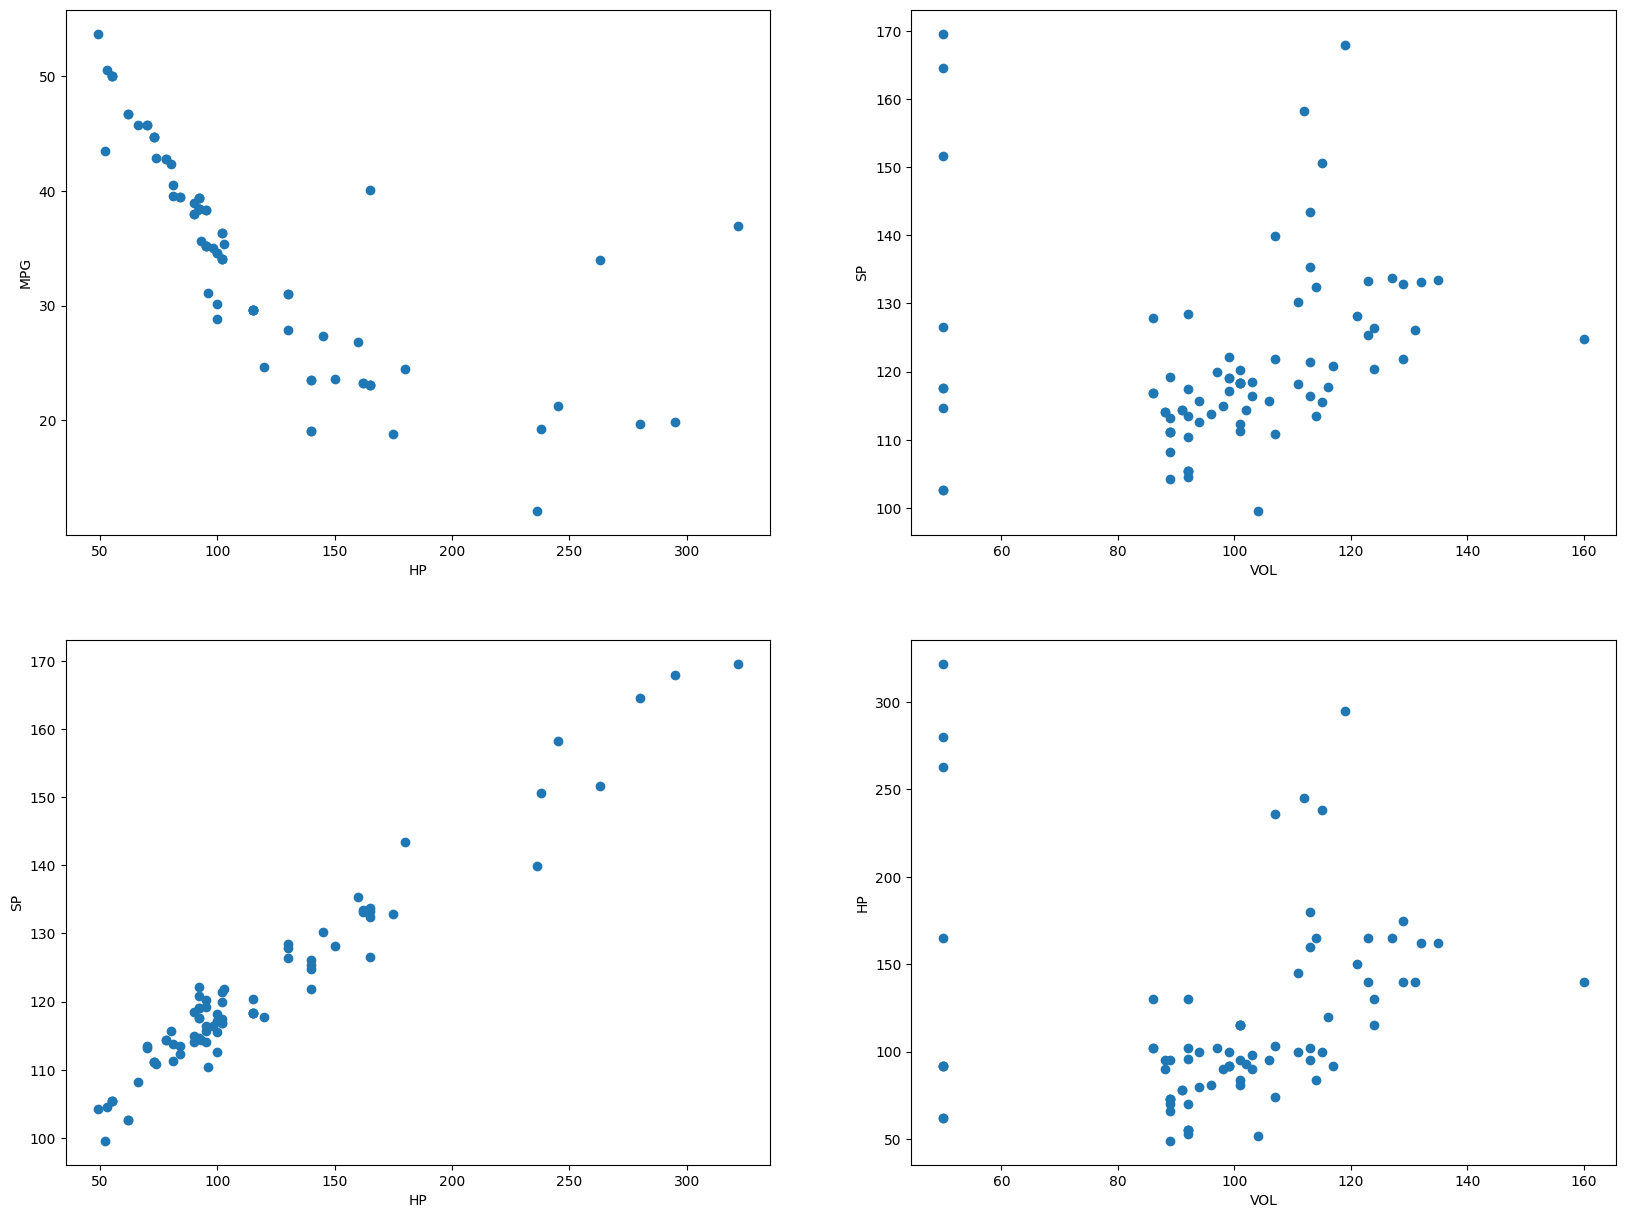

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.scatter(cars['HP'],cars['MPG'])
plt.xlabel('HP')
plt.ylabel('MPG')
plt.subplot(2,2,2)
plt.scatter(cars['VOL'],cars['SP'])
plt.xlabel('VOL')
plt.ylabel('SP')
plt.subplot(2,2,3)
plt.scatter(cars['HP'],cars['SP'])
plt.xlabel('HP')
plt.ylabel('SP')
plt.subplot(2,2,4)
plt.scatter(cars['VOL'],cars['HP'])
plt.xlabel('VOL')
plt.ylabel('HP')
plt.show()


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('MPG ~ WT + VOL + SP + HP', data=cars).fit()
model.params


,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [ ]:
model.tvalues, model.pvalues

(Intercept    2.058841
 WT           0.236541
 VOL         -0.590970
 SP           2.499880
 HP          -5.238735
 dtype: float64,
 Intercept    0.042936
 WT           0.813649
 VOL          0.556294
 SP           0.014579
 HP           0.000001
 dtype: float64)

In [ ]:
model.rsquared, model.rsquared_adj

(0.7705372737359842, 0.7584602881431413)

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

data = {'HP': [100, 150, 200, 250],
        'WT': [2000, 2500, 3000, 3500],
        'SP': [10, 12, 15, 18],
        'VOL': [20, 25, 30, 35]}
cars = pd.DataFrame(data)

rsq_vol = smf.ols('VOL~WT+SP+HP', data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP', data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

rsq_hp = smf.ols('HP~WT+VOL+SP', data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP', data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

d1 = {'Variables': ['HP', 'WT', 'VOL', 'SP'], 'VIF': [vif_hp, vif_wt, vif_vol, vif_sp]}

Vif_frame = pd.DataFrame(d1)
print(Vif_frame)

  Variables    VIF
0        HP    inf
1        WT    inf
2       VOL    inf
3        SP  122.5


<ipython-input-12-591164e1d4ea>:11: RuntimeWarning: divide by zero encountered in scalar divide
  vif_vol = 1/(1-rsq_vol)
<ipython-input-12-591164e1d4ea>:17: RuntimeWarning: divide by zero encountered in scalar divide
  vif_hp = 1/(1-rsq_hp)
<ipython-input-12-591164e1d4ea>:20: RuntimeWarning: divide by zero encountered in scalar divide
  vif_wt = 1/(1-rsq_wt)


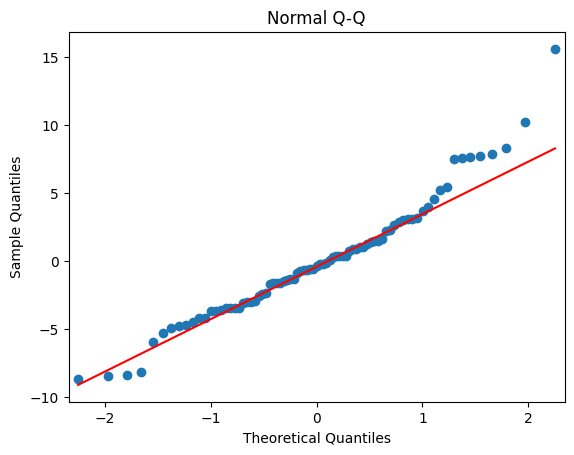

In [ ]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q')
plt.show()


In [ ]:
list(np.where(model.resid>10))

[array([ 0, 76])]

In [ ]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

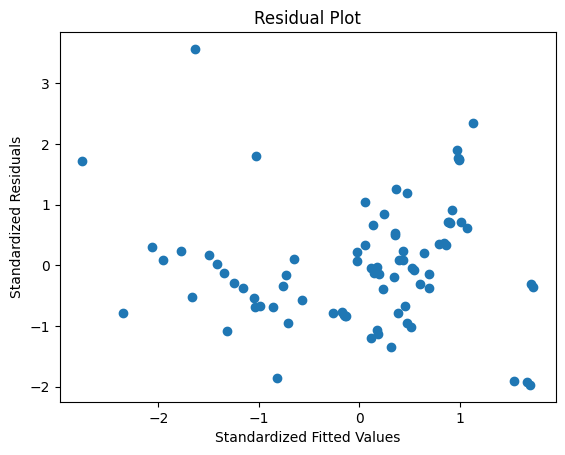

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

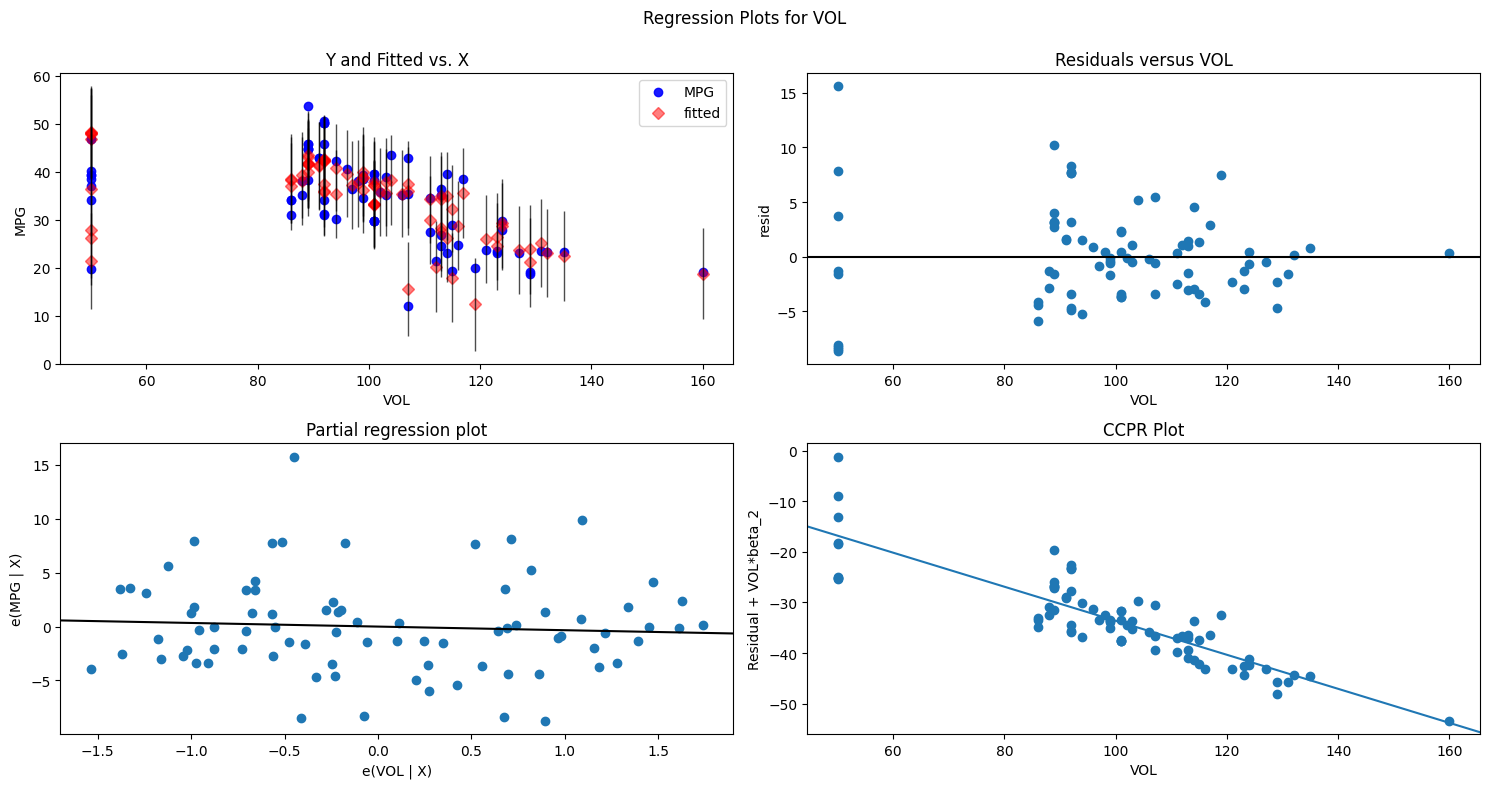

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

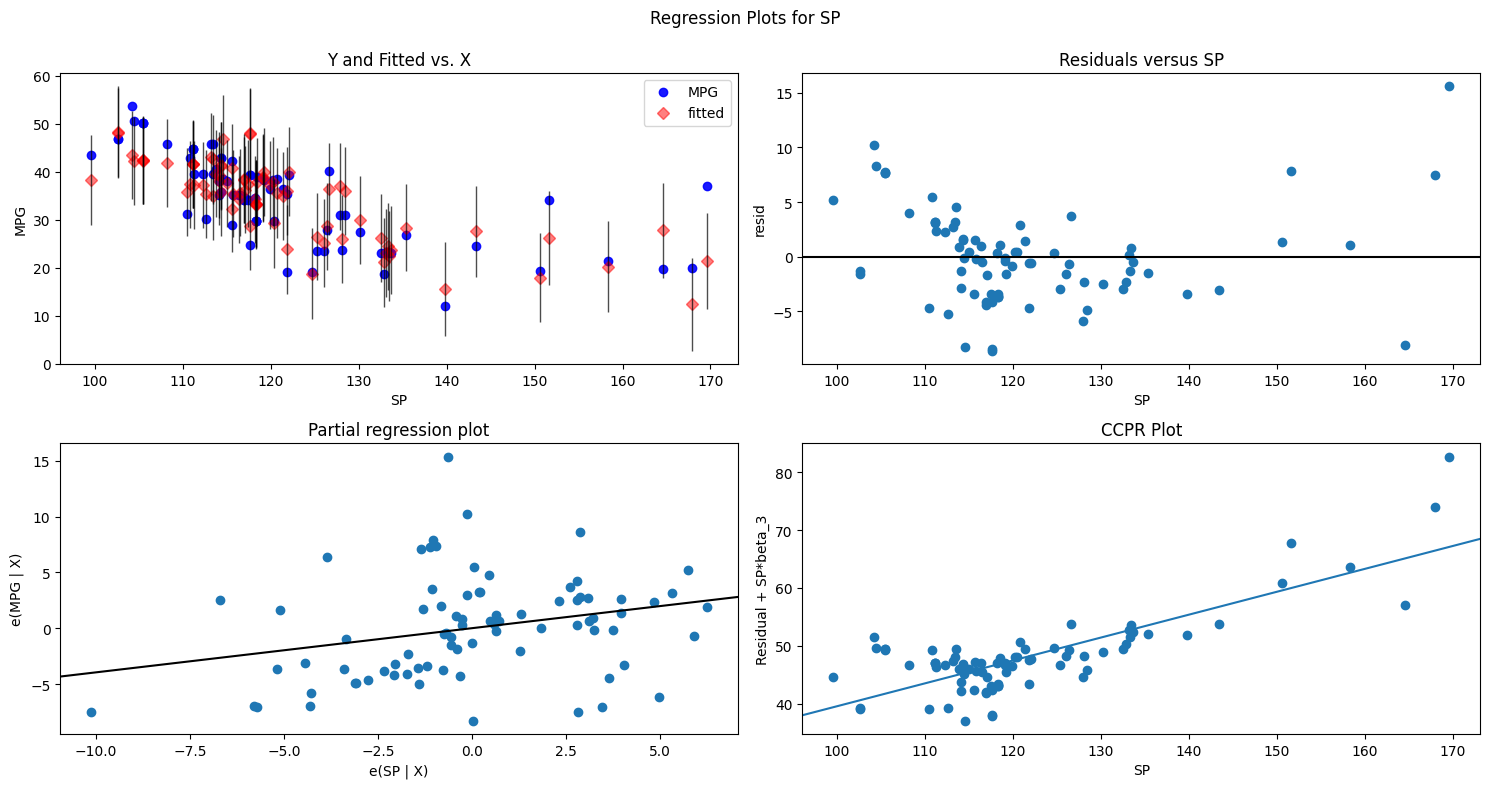

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

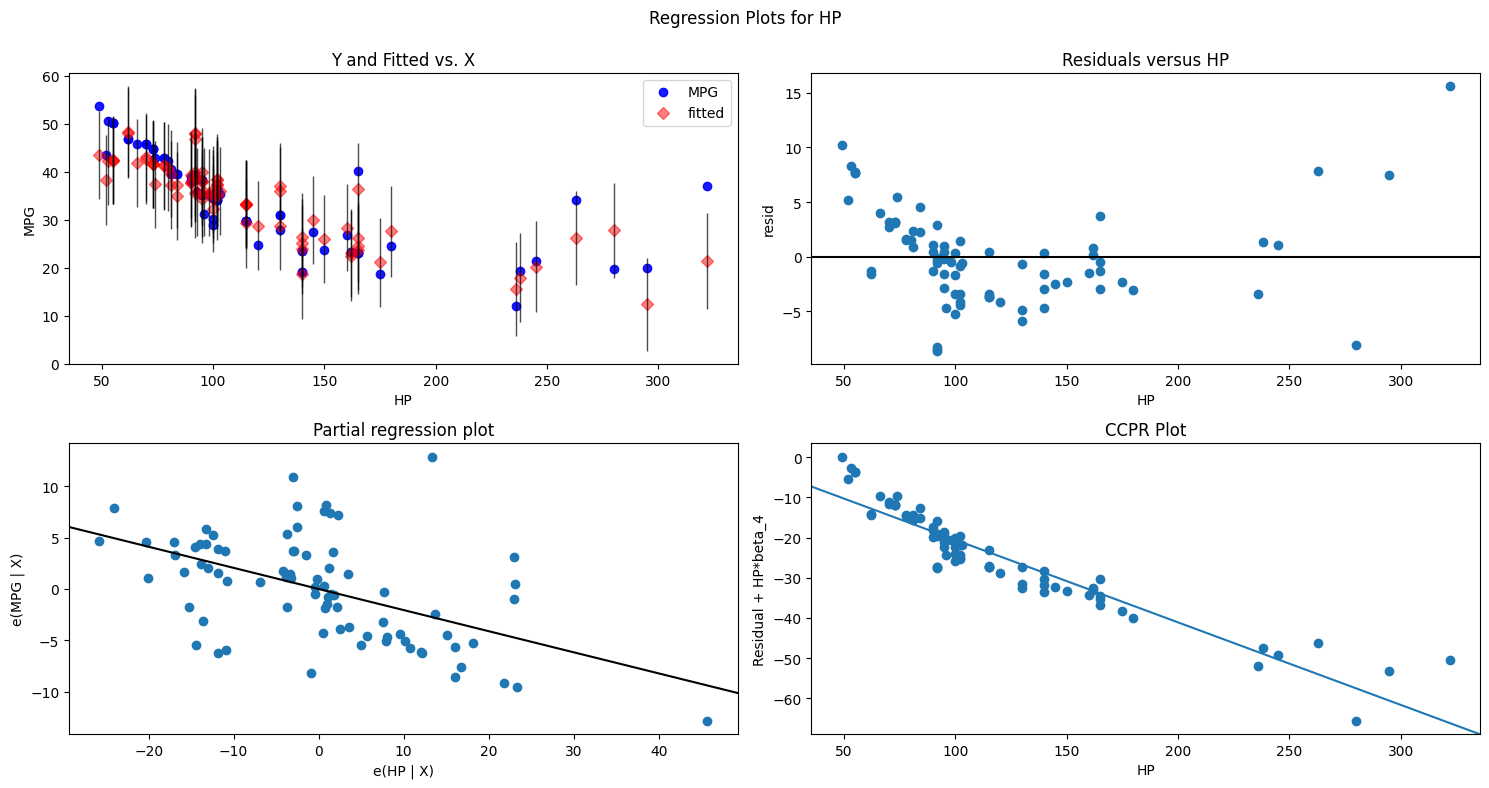

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

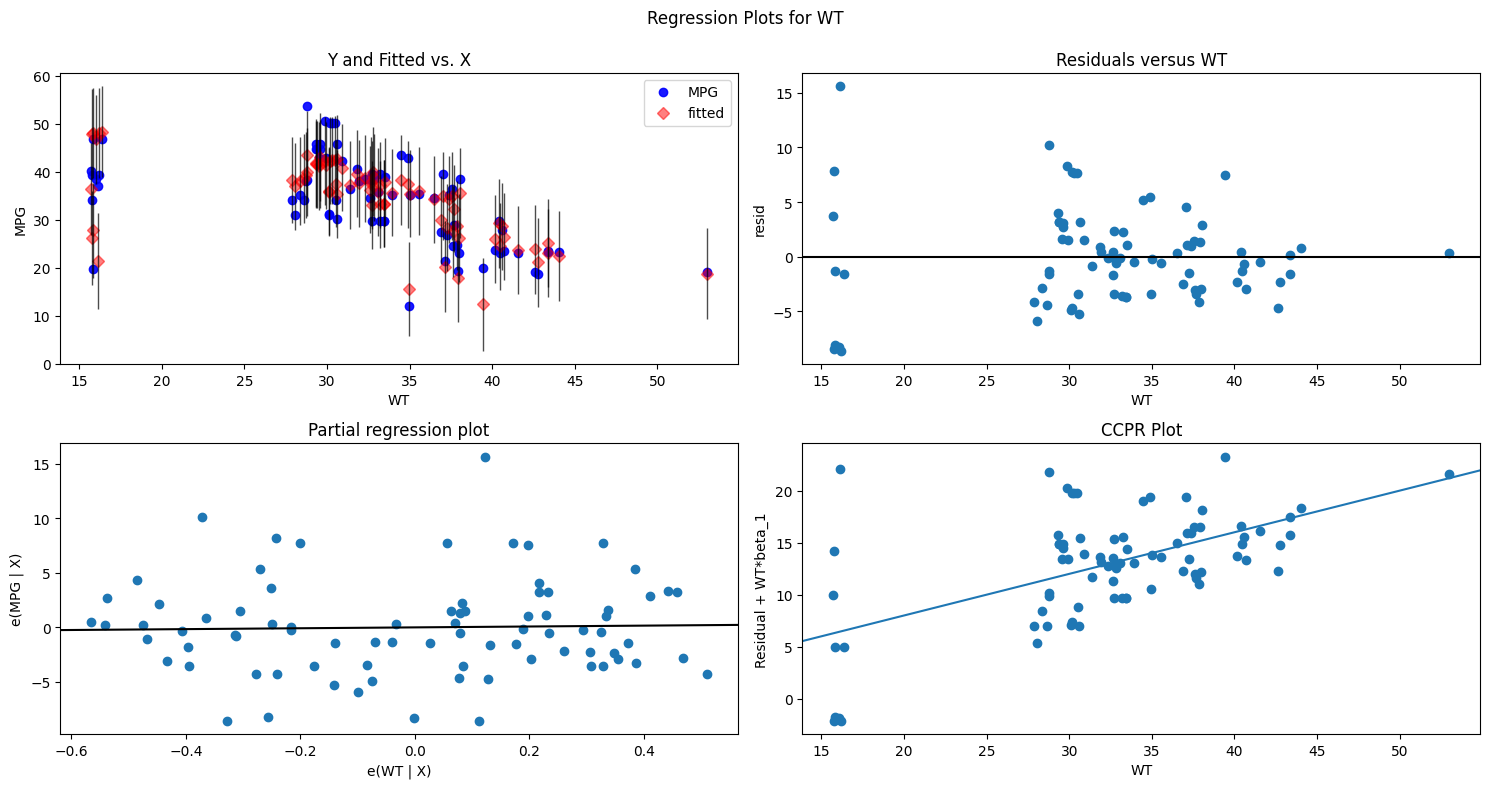

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

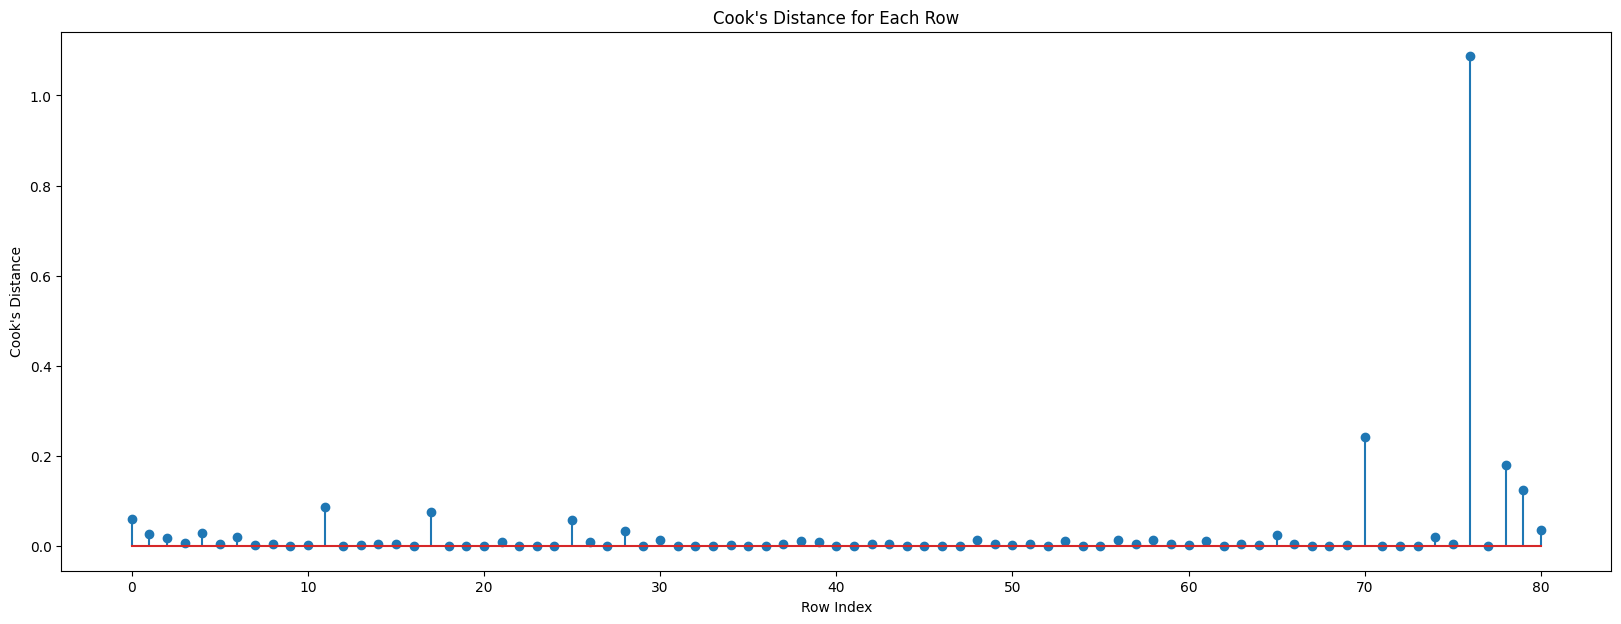

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(c)), np.round(c, 3))

plt.xlabel('Row Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance for Each Row')
plt.show()
